In [1]:
import pandas as pd
import numpy as np
import os
import string
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import StrMethodFormatter
%matplotlib inline

In [2]:
summary1 = pd.read_csv('../../../results/Automated-Emissions-Summary.csv')
summary = summary1.drop(summary1.columns[0], axis=1)
summary.index = summary.index + 1 #reorder the index to start as 1 instead of 0
summary = summary.drop(summary.index[-1])
summary

# Assuming 'condition' is the condition for selecting rows
condition = (summary['Sector'] == 'Electricity Consumption')  # Replace with your condition

# Change the values in 'Column_Name' for the selected rows
summary['Subsector'][condition] = summary['Subsector'][condition] +' '+ 'electricity'

# Assuming 'condition' is the condition for selecting rows
condition = (summary['Sector'] == 'Stationary Combustion')  # Replace with your condition

# Change the values in 'Column_Name' for the selected rows
summary['Subsector'][condition] = summary['Subsector'][condition] +' '+ 'buildings'

summary

C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_11360\1605656843.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary['Subsector'][condition] = summary['Subsector'][condition] +' '+ 'electricity'
C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_11360\1605656843.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary['Subsector'][condition] = summary['Subsector'][condition] +' '+ 'buildings'


,Sector,Subsector,Category,MSA,County,Year,Population,Total Emissions (MMTCO2e),Emissions per capita (MTCO2e),CO2 Emissions (MMTCO2e),CH4 Emissions (MMTCO2e),N2O Emissions (MMTCO2e)
1,Mobile Combustion,Automobile,Gasoline,New Haven-Milford,New Haven,2021,864751,1.028899,1.189821,1.022483,0.000561,0.005855
2,Mobile Combustion,Automobile,Gasoline,Hartford-east Hartford-Middletown,"Hartford, Middlesex, Tolland",2021,1238888,1.558471,1.257960,1.548753,0.000850,0.008868
3,Mobile Combustion,Automobile,Gasoline,Bridgeport-Stamford-Norwalk,Fairfield,2021,986344,1.062378,1.077086,1.055753,0.000580,0.006045
4,Mobile Combustion,Motorcycle,Gasoline,New Haven-Milford,New Haven,2021,864751,0.036643,0.042374,0.036643,0.000000,0.000000
5,Mobile Combustion,Motorcycle,Gasoline,Hartford-east Hartford-Middletown,"Hartford, Middlesex, Tolland",2021,1238888,0.055503,0.044801,0.055503,0.000000,0.000000
6,Mobile Combustion,Motorcycle,Gasoline,Bridgeport-Stamford-Norwalk,Fairfield,2021,986344,0.037835,0.038359,0.037835,0.000000,0.000000
7,Mobile Combustion,Trucks,Diesel,New Haven-Milford,New Haven,2021,864751,1.789613,2.069512,1.788362,0.000097,0.001154
8,Mobile Combustion,Trucks,Diesel,Hartford-east Hartford-Middletown,"Hartford, Middlesex, Tolland",2021,1238888,2.710721,2.188028,2.708827,0.000147,0.001747
9,Mobile Combustion,Trucks,Diesel,Bridgeport-Stamford-Norwalk,Fairfield,2021,986344,1.847843,1.873427,1.846552,0.000100,0.001191
10,Mobile Combustion,Buses,Diesel,New Haven-Milford,New Haven,2021,864751,0.020234,0.023399,0.020193,0.000003,0.000038


In [45]:
#mobile emissions 
mobile = pd.read_csv('../../../results/Mobile-combustion-emissions.csv')
mobile = mobile['GHG Emissions(MMTCO2e)']
electric = pd.read_csv('../../../results/2021-Electricity-consumption-emissions.csv')
electric = electric['Total Emissions (MMTCO2e)']
residential_breakdowm = pd.read_csv('../../../results/residential-emissions-breakdown-fuel.csv')
residential_oil = residential_breakdowm.iloc[2,1:][::-1].reset_index(drop=True).astype(float)
residential_propane = residential_breakdowm.iloc[1,1:][::-1].reset_index(drop=True).astype(float)
residential_natural = residential_breakdowm.iloc[0,1:][::-1].reset_index(drop=True).astype(float)
commercial = summary.loc[28:30,['Total Emissions (MMTCO2e)']]['Total Emissions (MMTCO2e)'].reset_index(drop=True).astype(float)
industrial = summary.loc[31:33,['Total Emissions (MMTCO2e)']]['Total Emissions (MMTCO2e)'].reset_index(drop=True).astype(float)
stationary = residential_oil+residential_propane+residential_natural+commercial+industrial
solid_waste = summary.loc[19:21,['Total Emissions (MMTCO2e)']]['Total Emissions (MMTCO2e)'].reset_index(drop=True).astype(float)
agriculture = pd.read_csv('../../../results/agriculture-emissions.csv')
agriculture = agriculture['GHG Emissions (MMTCO2e)']
wastewater = summary.loc[43:45,['Total Emissions (MMTCO2e)']]['Total Emissions (MMTCO2e)'].reset_index(drop=True).astype(float)
forest = pd.read_csv('../../../results/land-cover-emissions.csv')
forest = forest['Total carbon sequestration (MMTCO2e)']*(-1)
residential_breakdowm

,Unnamed: 0,BSN,HEM,NHM
0,Natural gas,0.568765,0.773233,0.543774
1,Propane,0.077129,0.110958,0.057276
2,Fuel oil,0.846248,1.180163,0.759970
3,Total (MMTCO2e),1.492142,2.064354,1.361021


In [26]:
import pandas as pd

# Creating a sample DataFrame
data = {
    'MSA': ['New Haven-Milford', 'Hartford-east Hartford-Middletown', 'Bridgeport-Stamford-Norwalk'],
    'Mobile': mobile,
    'Electric': electric,
    'Stationary': stationary,
    'Solid waste': solid_waste,
    'Wastewater': wastewater,
    'Agriculture': agriculture,
    'Forestry': forest,
}

df = pd.DataFrame(data)

# Display the created DataFrame

df.set_index('MSA', inplace=True)

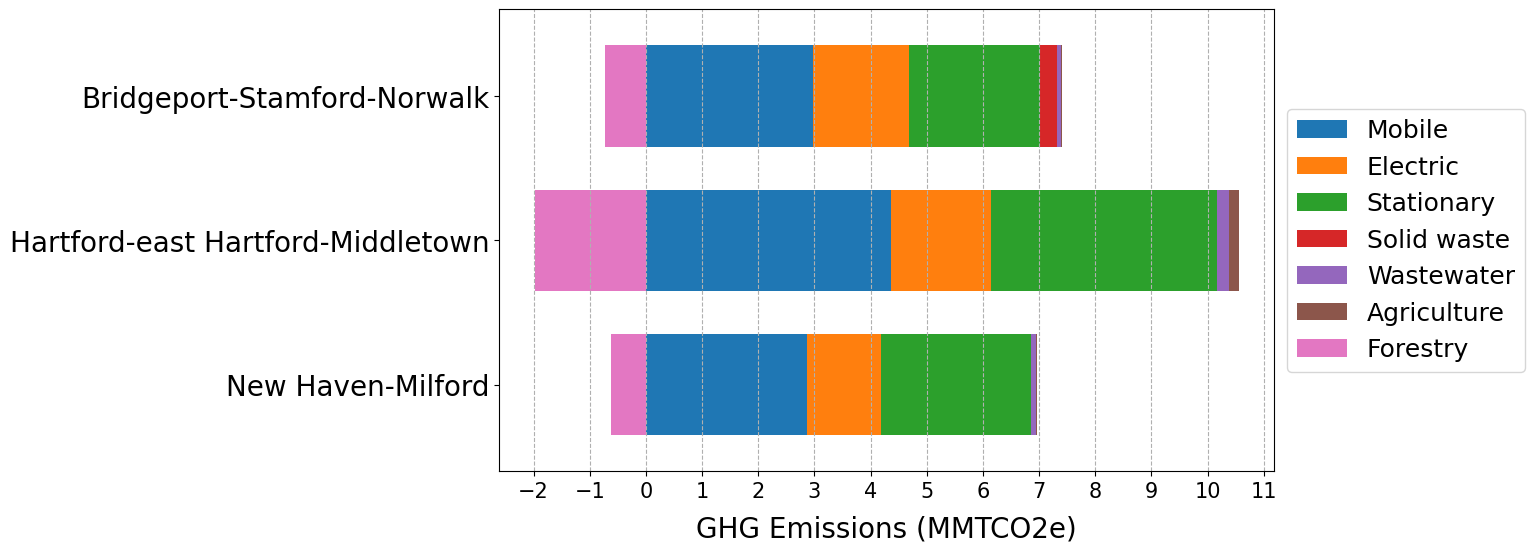

In [27]:


# Plot the DataFrame with x and y axes flipped
ax = df.plot(kind='barh', stacked=True, figsize=(10, 6),width =0.7)
ax.set_xlabel('GHG Emissions (MMTCO2e)', fontsize=20,labelpad=10)


# Add grid
ax.grid(axis='x', linestyle='--', alpha=1)

# Remove y-axis label
ax.set_ylabel('')

# Set the legend outside of the graph
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=18)

# Set font size for labels and ticks
ax.tick_params(axis='both', which='both', labelsize=15)

ax.set_xticks(range(-2, int(df.max().max()) + 8, 1))  # Adjust the interval (5 in this case)

ax.tick_params(axis='y', labelsize=20)



# Show the plot
plt.savefig('../../../figures/Report-images/emissions-summary.png', dpi=600, bbox_inches='tight')

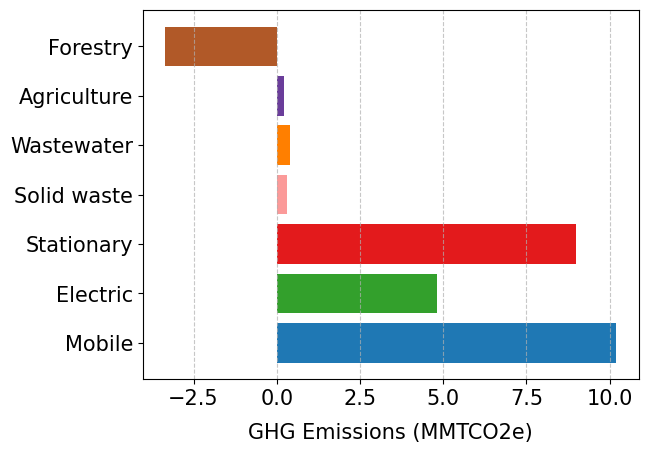

In [28]:
import matplotlib.pyplot as plt

# Manually choose colors for each stacked bar
custom_colors = ['#1f78b4', '#33a02c', '#e31a1c', '#fb9a99', '#ff7f00', '#6a3d9a', '#b15928', '#fb9a99', '#a6cee3', '#b2df8a']

# Plot the DataFrame with x and y axes flipped, using the specified colors
ax = plt.gca()

# Loop through each row in the DataFrame and plot individual bars
for i, row in enumerate(df.iterrows()):
    bottom = df.iloc[:i].sum() if i > 0 else 0
    ax.barh(df.columns, row[1], left=bottom, color=custom_colors)

# Add grid
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Set x-axis label
ax.set_xlabel('GHG Emissions (MMTCO2e)', fontsize=15, labelpad=10)

# Remove y-axis label
ax.set_ylabel('')

# Set font size for labels and ticks
ax.tick_params(axis='both', which='both', labelsize=15)

# Show the plot or save it to a file
plt.savefig('../../../figures/emissions-summary.png', dpi=600, bbox_inches='tight')
plt.show()



In [29]:
df['Total']=df.sum(axis=1)
df

,Mobile,Electric,Stationary,Solid waste,Wastewater,Agriculture,Forestry,Total
MSA,,,,,,,,
New Haven-Milford,2.875389,1.314940,2.656305,0.000000,0.092857,0.029241,-0.627891,6.340842
Hartford-east Hartford-Middletown,4.355344,1.790219,4.012636,0.000476,0.227553,0.174026,-1.983747,8.576507
Bridgeport-Stamford-Norwalk,2.968949,1.719647,2.329686,0.296673,0.076608,0.014857,-0.737232,6.669188


In [30]:
mobile_ratio = df['Mobile']/df['Total']
#resi = df['Residential']/df['Total']
fore = df['Forestry']/df['Total']
elec = df['Electric']/df['Total']
elec

MSA
New Haven-Milford                    0.207376
Hartford-east Hartford-Middletown    0.208735
Bridgeport-Stamford-Norwalk          0.257850
dtype: float64

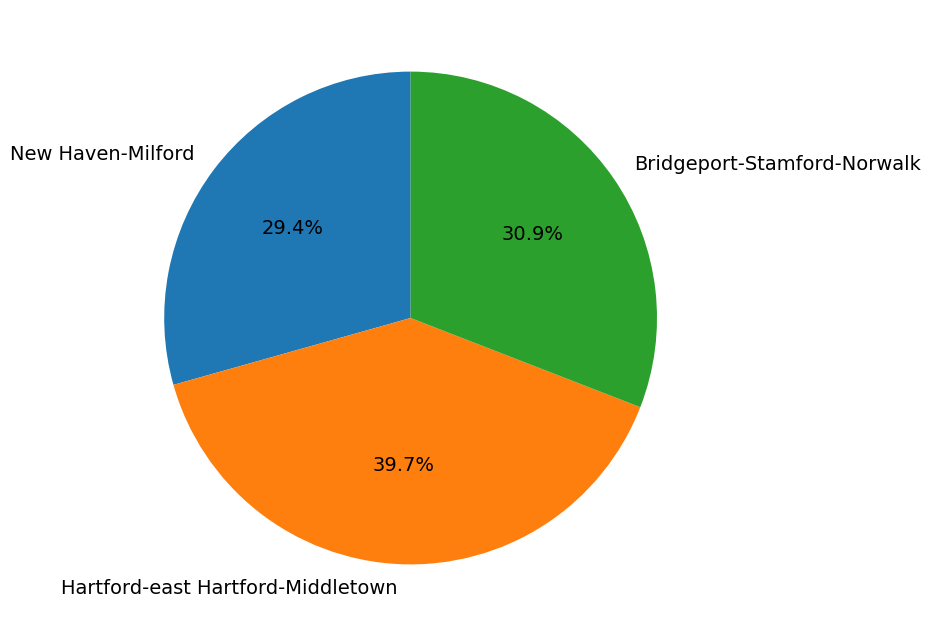

In [31]:


# Plot the pie chart
ax = df.sum(axis=1).plot.pie(autopct='%1.1f%%', startangle=90, figsize=(8, 8), textprops={'fontsize': 14})
ax.set_ylabel('')  # Remove y-axis label


# Show the plot
plt.savefig('../../../figures/emissions-total.png', dpi=600, bbox_inches='tight')

In [32]:
#emissions per capita

mobile = pd.read_csv('../../../results/Mobile-combustion-emissions.csv')
mobile = mobile['emissions per capita (MTCO2e)']
electric = pd.read_csv('../../../results/2021-Electricity-consumption-emissions.csv')
electric =electric['Emissions per capita (MTCO2e)']
residential = summary.loc[25:27,['Emissions per capita (MTCO2e)']]['Emissions per capita (MTCO2e)'].reset_index(drop=True).astype(float)
commercial = summary.loc[28:30,['Emissions per capita (MTCO2e)']]['Emissions per capita (MTCO2e)'].reset_index(drop=True).astype(float)
industrial = summary.loc[31:33,['Emissions per capita (MTCO2e)']]['Emissions per capita (MTCO2e)'].reset_index(drop=True).astype(float)
stationary = residential+commercial+industrial
solid_waste = summary.loc[19:21,['Emissions per capita (MTCO2e)']]['Emissions per capita (MTCO2e)'].reset_index(drop=True).astype(float)
agriculture = pd.read_csv('../../../results/agriculture-emissions.csv')
agriculture['emissions per capita (MTCO2e)']=agriculture['GHG Emissions (MMTCO2e)']/[862127,1213123,947328]*1000000
agriculture=agriculture['emissions per capita (MTCO2e)']
wastewater = summary.loc[43:45,['Emissions per capita (MTCO2e)']]['Emissions per capita (MTCO2e)'].reset_index(drop=True).astype(float)
forest = pd.read_csv('../../../results/land-cover-emissions.csv')
forest = forest['Total carbon sequestration (MMTCO2e)']*(-1)/[862127,1213123,947328]*1000000

# Creating a sample DataFrame
data1 = {
    'MSA': ['New Haven-Milford', 'Hartford-east Hartford-Middletown', 'Bridgeport-Stamford-Norwalk'],
    'Mobile': mobile,
    'Electric': electric,
    'Stationary': stationary,
    'Solid waste': solid_waste,
    'Wastewater': wastewater,
    'Agriculture': agriculture,
    'Forestry': forest,
}


df1 = pd.DataFrame(data1)
df1

,MSA,Mobile,Electric,Stationary,Solid waste,Wastewater,Agriculture,Forestry
0,New Haven-Milford,3.325107,1.520600,3.104128,0.000000,0.107380,0.033917,-0.728305
1,Hartford-east Hartford-Middletown,3.515527,1.475466,3.258271,0.000384,0.183675,0.143453,-1.635240
2,Bridgeport-Stamford-Norwalk,3.010054,1.797955,2.394380,0.300780,0.077668,0.015683,-0.778222


In [35]:
df1['Total']=df1.iloc[:, 1:].sum(axis=1)
df1

,MSA,Mobile,Electric,Stationary,Solid waste,Wastewater,Agriculture,Forestry,Total
0,New Haven-Milford,3.325107,1.520600,3.104128,0.000000,0.107380,0.033917,-0.728305,14.725655
1,Hartford-east Hartford-Middletown,3.515527,1.475466,3.258271,0.000384,0.183675,0.143453,-1.635240,13.883074
2,Bridgeport-Stamford-Norwalk,3.010054,1.797955,2.394380,0.300780,0.077668,0.015683,-0.778222,13.636598


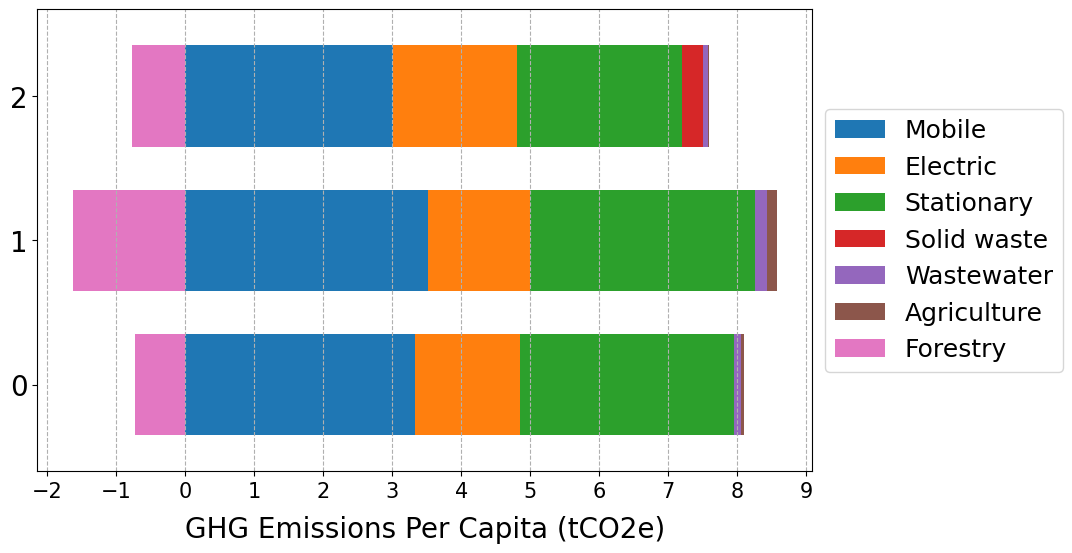

In [36]:
#df1.set_index('MSA', inplace=True)

# Adjust the brightness (make colors darker)
# Plot the DataFrame with x and y axes flipped, and using the specified colormap
ax = df1.iloc[:,:-1].plot(kind='barh', stacked=True, figsize=(10, 6),width =0.7)
ax.set_xlabel('GHG Emissions Per Capita (tCO2e)', fontsize=20, labelpad=10)




# Add grid
ax.grid(axis='x', linestyle='--', alpha=1)

# Remove y-axis label
ax.set_ylabel('')

# Set the legend outside of the graph
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=18)

# Set font size for labels and ticks
ax.tick_params(axis='both', which='both', labelsize=15)

ax.set_xticks(range(-2, int(df.max().max()) + 2, 1))  # Adjust the interval (5 in this case)

ax.tick_params(axis='y', labelsize=20)



# Show the plot
plt.savefig('../../../figures/Report-images/emissions-per-capita.png', dpi=600, bbox_inches='tight')

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is named summary
df_new_haven = summary[(summary['MSA'] == 'New Haven-Milford') & (~summary['Sector'].str.contains('Forestry'))]
df_hartford = summary[(summary['MSA'] == 'Hartford-east Hartford-Middletown') & (~summary['Sector'].str.contains('Forestry'))]
df_bridgeport = summary[(summary['MSA'] == 'Bridgeport-Stamford-Norwalk') & (~summary['Sector'].str.contains('Forestry'))]

# Convert 'Total Emissions (MMTCO2e)' column to numeric, handling errors
df_new_haven['Total Emissions (MMTCO2e)'] = pd.to_numeric(df_new_haven['Total Emissions (MMTCO2e)'], errors='coerce')
df_hartford['Total Emissions (MMTCO2e)'] = pd.to_numeric(df_hartford['Total Emissions (MMTCO2e)'], errors='coerce')
df_bridgeport['Total Emissions (MMTCO2e)'] = pd.to_numeric(df_bridgeport['Total Emissions (MMTCO2e)'], errors='coerce')

# Get absolute values and calculate emissions percentage
total_new_haven = df_new_haven['Total Emissions (MMTCO2e)']
df_new_haven_sum = total_new_haven.sum()
df_new_haven['Emissions percentage (%)'] = df_new_haven['Total Emissions (MMTCO2e)'] / df_new_haven_sum * 100

total_hartford = df_hartford['Total Emissions (MMTCO2e)']
df_hartford_sum = total_hartford.sum()
df_hartford['Emissions percentage (%)'] = df_hartford['Total Emissions (MMTCO2e)'] / df_hartford_sum * 100

total_bridgeport = df_bridgeport['Total Emissions (MMTCO2e)']
df_bridgeport_sum = total_bridgeport.sum()
df_bridgeport['Emissions percentage (%)'] = df_bridgeport['Total Emissions (MMTCO2e)'] / df_bridgeport_sum * 100


C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_11360\1608038935.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_haven['Total Emissions (MMTCO2e)'] = pd.to_numeric(df_new_haven['Total Emissions (MMTCO2e)'], errors='coerce')
C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_11360\1608038935.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hartford['Total Emissions (MMTCO2e)'] = pd.to_numeric(df_hartford['Total Emissions (MMTCO2e)'], errors='coerce')
C:\Users\peiyaozhao\AppData\Local\Temp\i

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is named summary
# Assuming your DataFrame is named summary
df_new_haven = summary[(summary['MSA'] == 'New Haven-Milford') & (~summary['Sector'].str.contains('Forestry'))]
df_hartford = summary[(summary['MSA'] == 'Hartford-east Hartford-Middletown') & (~summary['Sector'].str.contains('Forestry'))]
df_bridgeport = summary[(summary['MSA'] == 'Bridgeport-Stamford-Norwalk') & (~summary['Sector'].str.contains('Forestry'))]

# Convert 'Total Emissions (MMTCO2e)' column to numeric, handling errors
df_new_haven['Emissions per capita (MTCO2e)'] = pd.to_numeric(df_new_haven['Emissions per capita (MTCO2e)'], errors='coerce')
df_hartford['Emissions per capita (MTCO2e)'] = pd.to_numeric(df_hartford['Emissions per capita (MTCO2e)'], errors='coerce')
df_bridgeport['Emissions per capita (MTCO2e)'] = pd.to_numeric(df_bridgeport['Emissions per capita (MTCO2e)'], errors='coerce')


C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_11360\2734759748.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_haven['Emissions per capita (MTCO2e)'] = pd.to_numeric(df_new_haven['Emissions per capita (MTCO2e)'], errors='coerce')
C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_11360\2734759748.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hartford['Emissions per capita (MTCO2e)'] = pd.to_numeric(df_hartford['Emissions per capita (MTCO2e)'], errors='coerce')
C:\Users\peiyaozhao\AppD

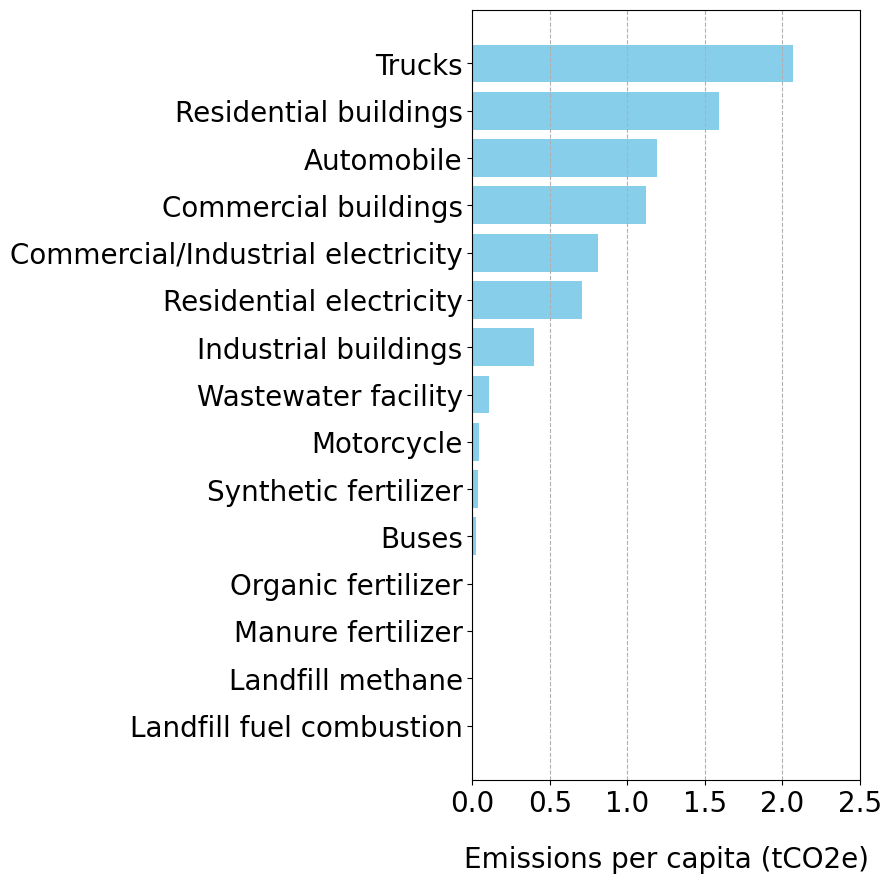

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_new_haven_sorted is your DataFrame
df_new_haven_sorted = df_new_haven.sort_values(by='Emissions per capita (MTCO2e)', ascending=True)

categories = df_new_haven_sorted['Subsector']
values = df_new_haven_sorted['Emissions per capita (MTCO2e)']

fig, ax = plt.subplots(figsize=(5, 10))

# Calculate the width of the bars based on the 'Emissions per capita (MTCO2e)' values
bar_widths = 0.8

# Create the bar plot with sorted values and categories
ax.barh(categories, values, height=bar_widths, color='skyblue')
ax.set_xlabel('Emissions per capita (tCO2e)', color='black', fontsize=20)

ax.tick_params(axis='x', labelcolor='black', labelsize=20)
ax.grid(axis='x', linestyle='--', alpha=1)
ax.tick_params(axis='x', labelcolor='black', labelsize=20)
ax.xaxis.labelpad = 20
ax.set_xticks(np.arange(0, 3, 0.5)) 
ax.tick_params(axis='y', labelcolor='black', labelsize=20)

# Show the plot
plt.savefig('../../../figures/Report-images/newh-emissions-capita.png', dpi=600, bbox_inches='tight')
plt.show()


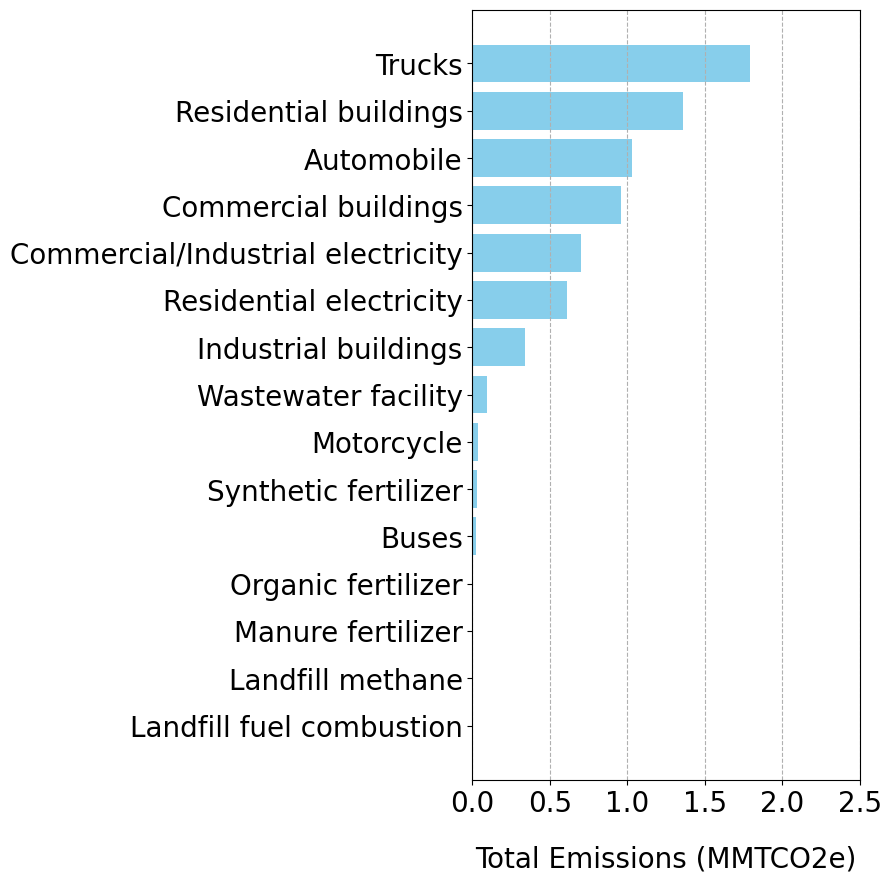

In [40]:
import matplotlib.pyplot as plt
import numpy as np

df_new_haven_sorted['Total Emissions (MMTCO2e)'] = pd.to_numeric(df_new_haven_sorted['Total Emissions (MMTCO2e)'], errors='coerce')

# Assuming df_new_haven_sorted is your DataFrame
df_new_haven_sorted = df_new_haven.sort_values(by='Total Emissions (MMTCO2e)', ascending=True)

categories = df_new_haven_sorted['Subsector']  # Reverse the order
values = df_new_haven_sorted['Total Emissions (MMTCO2e)']  # Reverse the order

fig, ax2 = plt.subplots(figsize=(5, 10))

# Calculate the width of the bars based on the 'Emissions per capita (MTCO2e)' values
bar_widths = 0.8

# Create the bar plot
ax2.barh(categories, values, height=bar_widths, color='skyblue')
ax2.set_xlabel('Total Emissions (MMTCO2e)', color='black', fontsize=20)

ax2.tick_params(axis='x', labelcolor='black', labelsize=20)
ax2.grid(axis='x', linestyle='--', alpha=1)
ax2.tick_params(axis='x', labelcolor='black', labelsize=20)
ax2.xaxis.labelpad = 20
ax2.set_xticks(np.arange(0, 3, 0.5)) 
ax2.tick_params(axis='y', labelcolor='black', labelsize=20)

# Show the plot
plt.savefig('../../../figures/Report-images/newh-emissions-total.png', dpi=600, bbox_inches='tight')
plt.show()


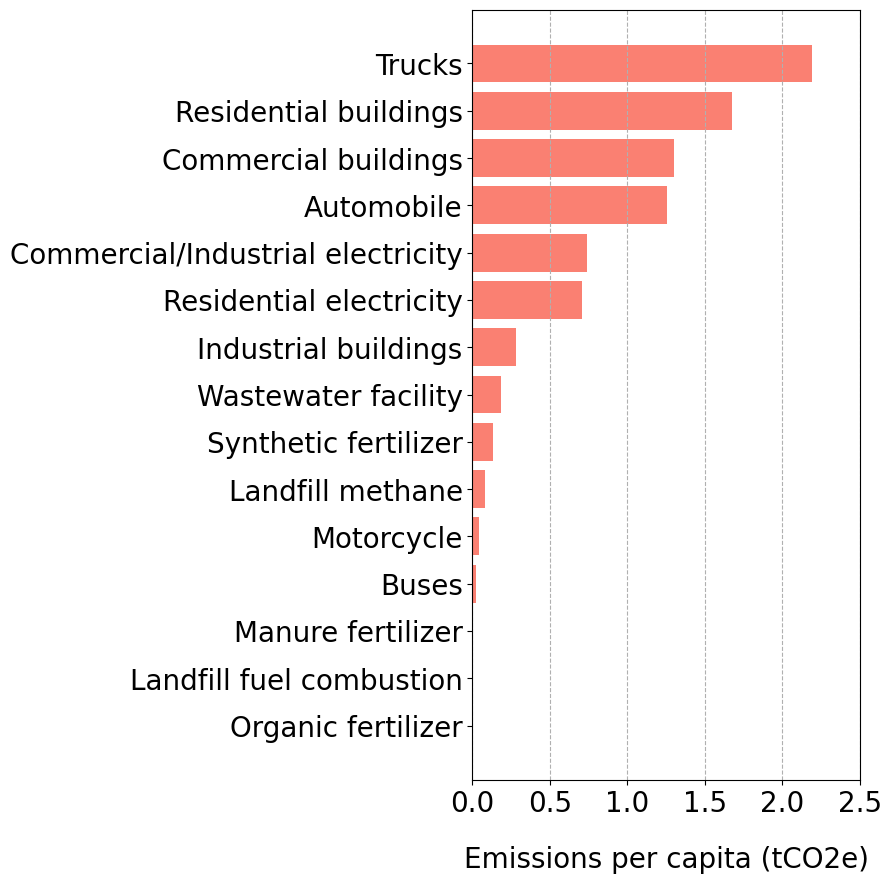

In [41]:
import matplotlib.pyplot as plt

# Assuming df_new_haven_sorted is your DataFrame
df_hartford_sorted = df_hartford.sort_values(by='Emissions per capita (MTCO2e)', ascending=True)

categories = df_hartford_sorted['Subsector']
values = df_hartford_sorted['Emissions per capita (MTCO2e)']


fig, ax2 = plt.subplots(figsize=(5, 10))

# Calculate the width of the bars based on the 'Total Emissions (MMTCO2e)' values
bar_widths = 0.8

# Create the first bar plot
ax2.barh(categories, values, height=bar_widths, color='salmon')
ax2.set_xlabel('Emissions per capita (tCO2e)', color='black',fontsize=20)


ax2.tick_params(axis='x', labelcolor='black',labelsize=20)

ax2.grid(axis='x', linestyle='--', alpha=1)

ax2.tick_params(axis='x', labelcolor='black',labelsize=20)

#ax1.xaxis.labelpad = 20  # You can adjust the value as needed
ax2.xaxis.labelpad = 20  # You can adjust the value as needed

ax2.set_xticks(np.arange(0, 3, 0.5)) 

# Set the x-tick label size
ax2.tick_params(axis='y', labelcolor='black', labelsize=20)  # Adjust the labelsize as needed





# Show the plot
plt.savefig('../../../figures/Report-images/Hartford-emissions-per-capita.png', dpi=600, bbox_inches='tight')

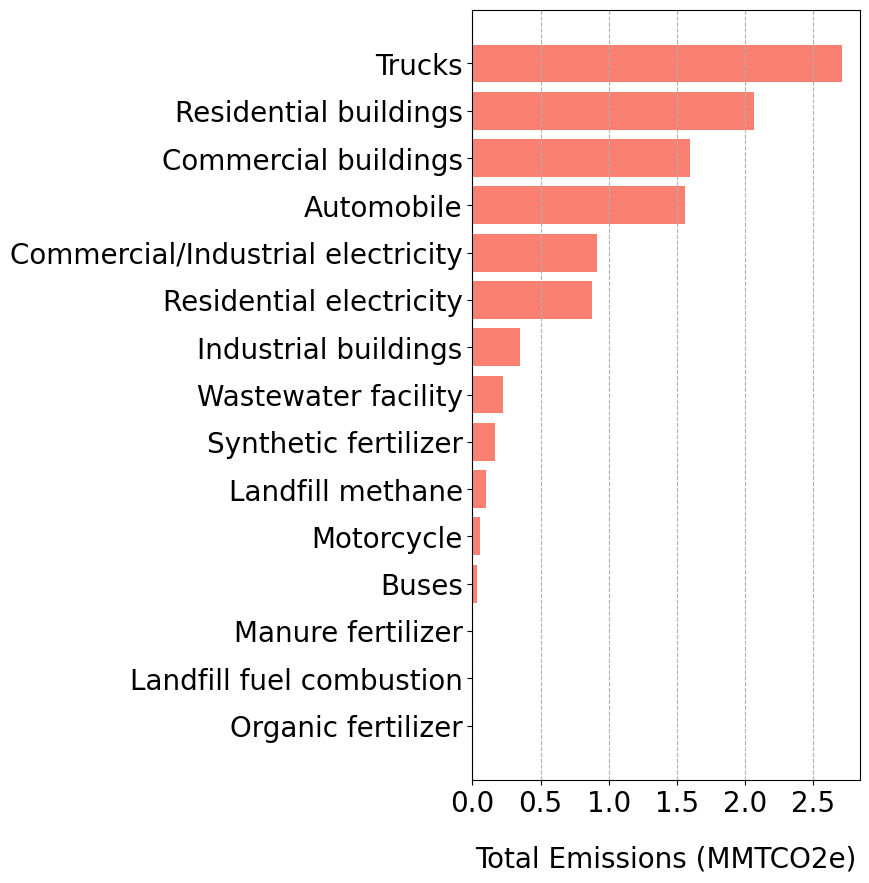

In [42]:
import matplotlib.pyplot as plt
import numpy as np

df_hartford_sorted['Total Emissions (MMTCO2e)'] = pd.to_numeric(df_hartford_sorted['Total Emissions (MMTCO2e)'], errors='coerce')

# Assuming df_new_haven_sorted is your DataFrame
df_hartford_sorted = df_hartford.sort_values(by='Total Emissions (MMTCO2e)', ascending=True)

categories = df_hartford_sorted['Subsector']  # Reverse the order
values = df_hartford_sorted['Total Emissions (MMTCO2e)']  # Reverse the order

fig, ax2 = plt.subplots(figsize=(5, 10))

# Calculate the width of the bars based on the 'Emissions per capita (MTCO2e)' values
bar_widths = 0.8

# Create the bar plot
ax2.barh(categories, values, height=bar_widths, color='salmon')
ax2.set_xlabel('Total Emissions (MMTCO2e)', color='black', fontsize=20)

ax2.tick_params(axis='x', labelcolor='black', labelsize=20)
ax2.grid(axis='x', linestyle='--', alpha=1)
ax2.tick_params(axis='x', labelcolor='black', labelsize=20)
ax2.xaxis.labelpad = 20
ax2.set_xticks(np.arange(0, 3, 0.5)) 
ax2.tick_params(axis='y', labelcolor='black', labelsize=20)

# Show the plot
plt.savefig('../../../figures/Report-images/hartford-emissions-total.png', dpi=600, bbox_inches='tight')
plt.show()


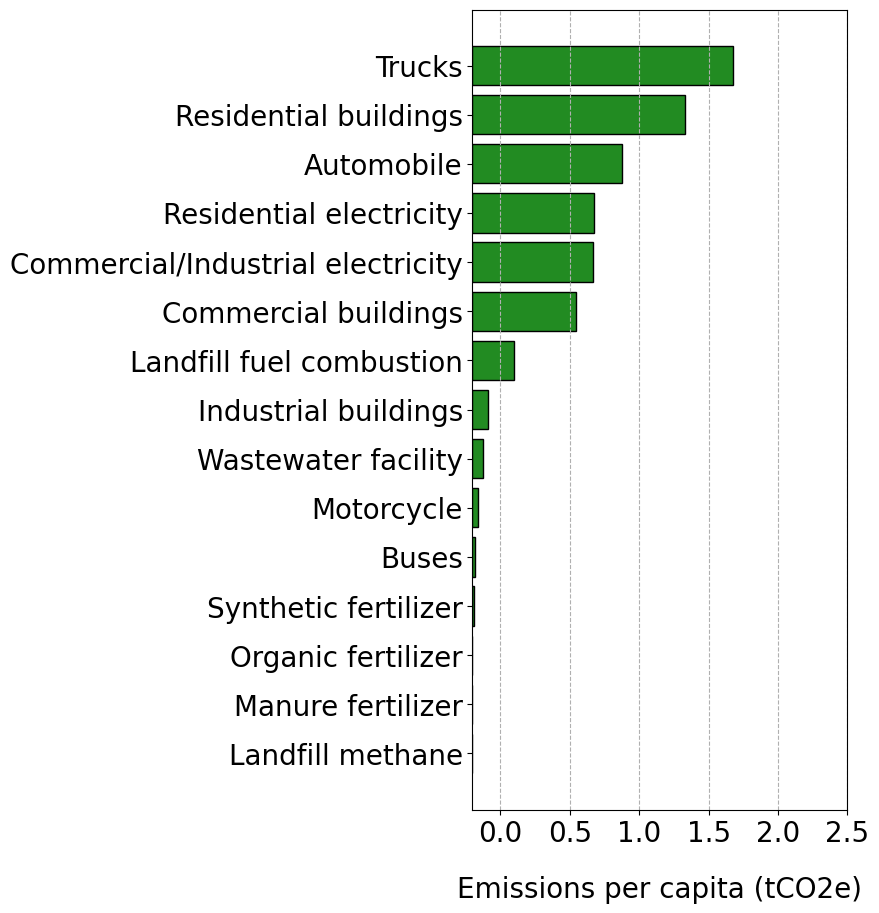

In [43]:
import matplotlib.pyplot as plt

# Assuming df_new_haven_sorted is your DataFrame
df_bridgeport_sorted = df_bridgeport.sort_values(by='Emissions per capita (MTCO2e)', ascending=True)

categories = df_bridgeport_sorted['Subsector']
values = df_bridgeport_sorted['Emissions per capita (MTCO2e)']


fig, ax2 = plt.subplots(figsize=(5, 10))

# Calculate the width of the bars based on the 'Total Emissions (MMTCO2e)' values
bar_widths = 0.8

# Create the first bar plot
ax2.barh(categories, values, height=bar_widths, color='forestgreen', edgecolor='black', left=-0.2)
ax2.set_xlabel('Emissions per capita (tCO2e)', color='black',fontsize=20)


ax2.tick_params(axis='x', labelcolor='black',labelsize=20)

ax2.grid(axis='x', linestyle='--', alpha=1)

ax2.tick_params(axis='x', labelcolor='black',labelsize=20)

#ax1.xaxis.labelpad = 20  # You can adjust the value as needed
ax2.xaxis.labelpad = 20  # You can adjust the value as needed

ax2.set_xticks(np.arange(0, 3, 0.5)) 

# Set the x-tick label size
ax2.tick_params(axis='y', labelcolor='black', labelsize=20)  # Adjust the labelsize as needed



# Manually adjust subplots and margins to reduce white space
plt.subplots_adjust(left=0.2, right=0.95, top=0.9, bottom=0.1)


# Show the plot
plt.savefig('../../../figures/Report-images/bridgeport-emissions-per-capita.png', dpi=600, bbox_inches='tight')

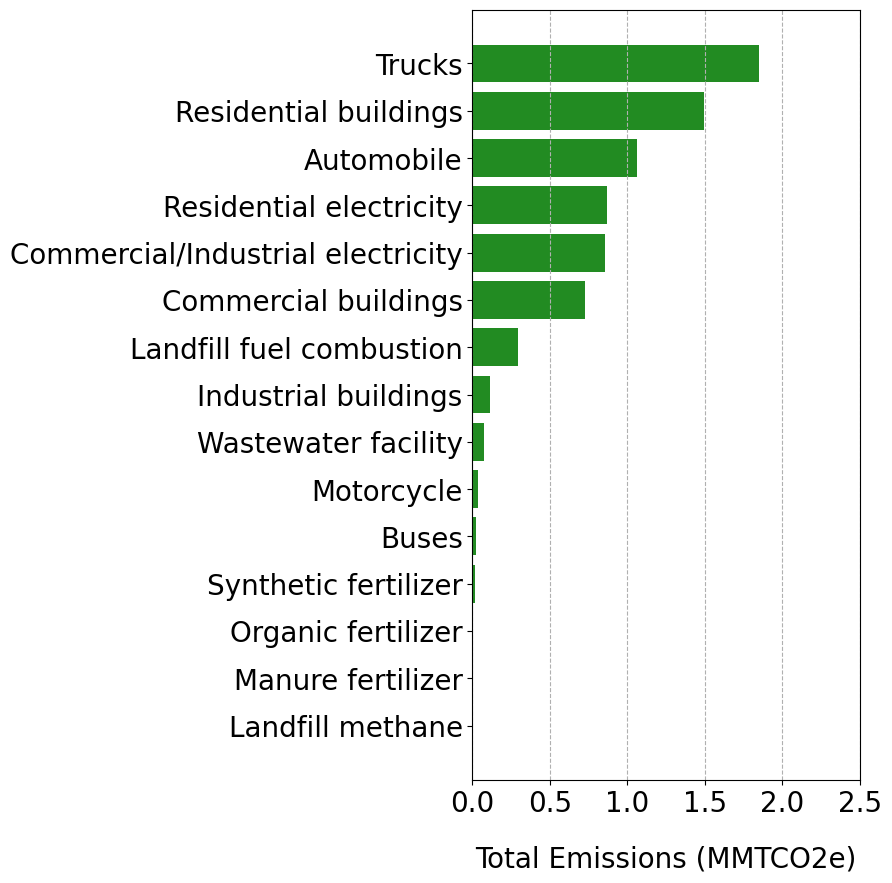

In [44]:
import matplotlib.pyplot as plt
import numpy as np

df_bridgeport_sorted['Total Emissions (MMTCO2e)'] = pd.to_numeric(df_bridgeport_sorted['Total Emissions (MMTCO2e)'], errors='coerce')

# Assuming df_new_haven_sorted is your DataFrame
df_bridgeport_sorted = df_bridgeport.sort_values(by='Total Emissions (MMTCO2e)', ascending=True)

categories = df_bridgeport_sorted['Subsector']  # Reverse the order
values = df_bridgeport_sorted['Total Emissions (MMTCO2e)']  # Reverse the order

fig, ax2 = plt.subplots(figsize=(5, 10))

# Calculate the width of the bars based on the 'Emissions per capita (MTCO2e)' values
bar_widths = 0.8

# Create the bar plot
ax2.barh(categories, values, height=bar_widths, color='forestgreen')
ax2.set_xlabel('Total Emissions (MMTCO2e)', color='black', fontsize=20)

ax2.tick_params(axis='x', labelcolor='black', labelsize=20)
ax2.grid(axis='x', linestyle='--', alpha=1)
ax2.tick_params(axis='x', labelcolor='black', labelsize=20)
ax2.xaxis.labelpad = 20
ax2.set_xticks(np.arange(0, 3, 0.5)) 
ax2.tick_params(axis='y', labelcolor='black', labelsize=20)

# Show the plot
plt.savefig('../../../figures/Report-images/bridgeport-emissions-total.png', dpi=600, bbox_inches='tight')
plt.show()
